**Importamos las librerias que utilizaremos**

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_excel('delitos_2021_BA.xlsx')

In [ ]:
df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
0,HC-2021-1008202,2021,Enero,Miércoles,2021-01-06,18,Homicidio,Siniestro Vial,NaN,Constitución,1.0,-34.62761,-58.379146,1.0
1,HC-2021-1009094,2021,Enero,Jueves,2021-01-07,10,Homicidio,Siniestro Vial,NaN,Mataderos,9.0,-34.64973,-58.51059,1.0
2,HC-2021-1013236,2021,Enero,Domingo,2021-01-10,7,Homicidio,Siniestro Vial,NaN,Parque Chacabuco,7.0,-34.629172,-58.430581,1.0
3,HC-2021-1014154,2021,Enero,Lunes,2021-01-11,9,Homicidio,Siniestro Vial,NaN,Nueva Pompeya,5.0,-34.638676,-58.414555,1.0
4,HC-2021-1015476,2021,Enero,Lunes,2021-01-11,21,Homicidio,Siniestro Vial,NaN,Parque Avellaneda,9.0,-34.647714,-58.468066,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88567 entries, 0 to 88566
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id-mapa    88567 non-null  object        
 1   anio       88567 non-null  int64         
 2   mes        88567 non-null  object        
 3   dia        88567 non-null  object        
 4   fecha      88567 non-null  datetime64[ns]
 5   franja     88567 non-null  object        
 6   tipo       88567 non-null  object        
 7   subtipo    16321 non-null  object        
 8   uso_armas  8472 non-null   object        
 9   barrio     87390 non-null  object        
 10  comuna     87907 non-null  float64       
 11  latitud    88567 non-null  object        
 12  longitud   88567 non-null  object        
 13  cantidad   7299 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 9.5+ MB


In [ ]:
df.dtypes

id-mapa              object
anio                  int64
mes                  object
dia                  object
fecha        datetime64[ns]
franja               object
tipo                 object
subtipo              object
uso_armas            object
barrio               object
comuna              float64
latitud              object
longitud             object
cantidad            float64
dtype: object

In [ ]:
df.shape

(88567, 14)

In [ ]:
df.size

1239938

**Idenficamos la cantidad de datos nulos por columna**

In [ ]:
df.isnull().sum()

id-mapa          0
anio             0
mes              0
dia              0
fecha            0
franja           0
tipo             0
subtipo      72246
uso_armas    80095
barrio        1177
comuna         660
latitud          0
longitud         0
cantidad     81268
dtype: int64

In [ ]:
 df = df.rename(columns={'tipo':'tipo_delito'})

In [ ]:
df.columns

Index(['id-mapa', 'anio', 'mes', 'dia', 'fecha', 'franja', 'tipo_delito',
       'subtipo', 'uso_armas', 'barrio', 'comuna', 'latitud', 'longitud',
       'cantidad'],
      dtype='object')

**Cambiar tipo de dato en columna**

In [ ]:
df = df.dropna(subset=['comuna'])

In [ ]:
df.comuna = df.comuna.astype(int)

In [ ]:
df.dtypes

id-mapa                object
anio                    int64
mes                    object
dia                    object
fecha          datetime64[ns]
franja                 object
tipo_delito            object
subtipo                object
uso_armas              object
barrio                 object
comuna                  int64
latitud                object
longitud               object
cantidad              float64
dtype: object

In [ ]:
df.isnull().sum()

id-mapa            0
anio               0
mes                0
dia                0
fecha              0
franja             0
tipo_delito        0
subtipo        71631
uso_armas      79509
barrio           517
comuna             0
latitud            0
longitud           0
cantidad       80609
dtype: int64

**Veamos los dias**

In [ ]:
df.dia.unique()

array(['Miércoles', 'Jueves', 'Domingo', 'Lunes', 'Martes', 'Viernes',
       'Sábado', 'jueves', 'martes', 'domingo', 'viernes', 'lunes',
       'miércoles', 'sábado'], dtype=object)

In [ ]:
df.dia = df.dia.replace({'miércoles':'Miércoles','jueves':'Jueves','viernes':'Viernes','sábado':'Sábado','domingo':'Domingo','lunes':'Lunes','martes':'Martes'})

In [ ]:
df.dia.unique()

array(['Miércoles', 'Jueves', 'Domingo', 'Lunes', 'Martes', 'Viernes',
       'Sábado'], dtype=object)

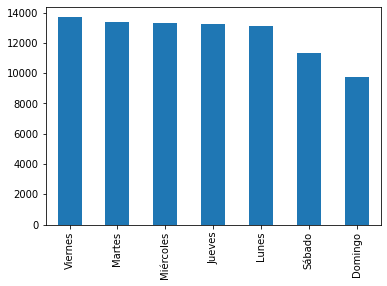

In [ ]:
df.dia.value_counts().plot(kind='bar')

**tipo de delito**

In [ ]:
df.tipo_delito.unique()

array(['Homicidio', 'Lesiones', 'Robo (con violencia)',
       'Hurto (sin violencia)'], dtype=object)

In [ ]:
df.tipo_delito.nunique()

4

**Cantidad de delitos por mes**

In [ ]:
df3 = df.groupby(['mes'])['tipo_delito'].count().reset_index(name='count')
df3

,mes,count
0,Abril,6524
1,Agosto,7644
2,Diciembre,8546
3,Enero,7203
4,Febrero,6855
5,Julio,7304
6,Junio,6687
7,Marzo,7957
8,Mayo,5830
9,Noviembre,8453


**Graficamos usando Ploty**

In [ ]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly_white'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [ ]:
fig = px.bar(df3, x='mes', y='count',
             color='count',
             template='plotly_dark',
             labels={'count':'Cantidad de Casos','mes':'Mes'},
             title='Cantidad de delitos por mes',
             height=400

    
)
fig.show()

**Cantidad de delitos por dias**

In [ ]:
df4 = df.groupby(['dia'])['tipo_delito'].count().reset_index(name='count')
df4

,dia,count
0,Domingo,9754
1,Jueves,13248
2,Lunes,13153
3,Martes,13393
4,Miércoles,13344
5,Sábado,11330
6,Viernes,13685


In [ ]:
fig = px.bar(df4, x='dia', y='count',
             color='count',
             template='xgridoff',
             labels={'count':'Cantidad de delitos','dia':'Día'},
             title='Cantidad de delitos por dia',
             height=400 
)
fig.show()

**Estudiaremos los casos de homicidios por barrio**

In [ ]:
df5 = df[(df.tipo_delito == 'Homicidio')]
df5.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo_delito,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
0,HC-2021-1008202,2021,Enero,Miércoles,2021-01-06,18,Homicidio,Siniestro Vial,NaN,Constitución,1,-34.62761,-58.379146,1.0
1,HC-2021-1009094,2021,Enero,Jueves,2021-01-07,10,Homicidio,Siniestro Vial,NaN,Mataderos,9,-34.64973,-58.51059,1.0
2,HC-2021-1013236,2021,Enero,Domingo,2021-01-10,7,Homicidio,Siniestro Vial,NaN,Parque Chacabuco,7,-34.629172,-58.430581,1.0
3,HC-2021-1014154,2021,Enero,Lunes,2021-01-11,9,Homicidio,Siniestro Vial,NaN,Nueva Pompeya,5,-34.638676,-58.414555,1.0
4,HC-2021-1015476,2021,Enero,Lunes,2021-01-11,21,Homicidio,Siniestro Vial,NaN,Parque Avellaneda,9,-34.647714,-58.468066,1.0


In [ ]:
df6 = df5.groupby('barrio')['tipo_delito'].count().reset_index(name='Homicidio').sort_values(by='Homicidio',
                                                                                       ascending=False)
df6.head(10)

,barrio,Homicidio
3,Barracas,21
11,Flores,19
2,Balvanera,18
16,Nueva Pompeya,10
35,Villa Lugano,10
27,Retiro,7
4,Belgrano,7
7,Caballito,7
10,Constitución,7
19,Palermo,7


**Cantidad de delitos por barrio**

In [ ]:
df7 = df.groupby(['barrio'])['tipo_delito'].count().reset_index().sort_values(by='tipo_delito',
                                                                                       ascending=False)
df8 = df7[df7.tipo_delito >= 2000]
df8.head(10)

,barrio,tipo_delito
21,Palermo,7785
2,Balvanera,5952
12,Flores,4842
28,Recoleta,4397
7,Caballito,4046
1,Almagro,3590
39,Villa Lugano,3295
4,Belgrano,3030
3,Barracas,2864
11,Constitución,2577


**Cantidad de delitos por comuna**

In [ ]:
df11 = df.groupby(['comuna'])['tipo_delito'].count().reset_index().sort_values(by='tipo_delito',
                                                                                       ascending=False)
df11.head(10)

,comuna,tipo_delito
1,1,9447
4,4,7796
14,14,7785
3,3,7579
7,7,6767
8,8,5713
13,13,5670
9,9,5203
15,15,5116
5,5,5019


In [ ]:
df11.tail()

,comuna,tipo_delito
2,2,4397
10,10,4225
6,6,4047
11,11,3919
0,0,517


**Cuántos caos por tipo de delitos existen?**

In [ ]:
df12 = df['tipo_delito'].value_counts(ascending=True).reset_index().sort_values(by='tipo_delito',
                                                                                       ascending=False)
df12

,index,tipo_delito
3,Robo (con violencia),44450
2,Hurto (sin violencia),36159
1,Lesiones,7106
0,Homicidio,192


In [ ]:
df12.columns = ['tipo_delito','count']
df12

,tipo_delito,count
3,Robo (con violencia),44450
2,Hurto (sin violencia),36159
1,Lesiones,7106
0,Homicidio,192


In [ ]:
fig = px.bar(df12, x='tipo_delito', y='count',
             color='count',
             template='plotly_white',
             labels={'tipo_delito':'Tipos de Delitos','dia':'Día'},
             title='Cantidad de delitos por dia',
             height=400 
)
fig.show()